Durante la práctica hemos incluido la primera hidden layer de 32 neuronas para **dar el efecto de dar profundidad a nuestra red** creando ya un *multilayer perceptron*. Para ello hemos definido las variables ```(W1, B1)``` y ```(W2, B2)```  y re-calculaado  las predicciones como $\hat{Y} = softmax(Y1*W2 + B2)$ siendo $Y1 = FA(X*W1+ B1)$, siendo FA la función de activación(aunque todo esto lo ha hecho keras por nosotros)

Hay que tener en cuenta que conforme le damos profundidad a la red es importante inicializar los pesos (```W1``` y ```W2``` en nuestro caso) con **valores aleatorios siguiendo una distribución gaussiana**. De otra forma, el optimizador puede quedarse atascado en la posición inicial y no ser capaz de moverse en la dirección del mínimo de la función de pérdidas.

A partir de dos capas ocultas en adelante es cuando podemos hablar de **redes neuronales profundas**. Ahora vamos a darle más profundidad a nuestra red poniendo cuatro capas ocultas, nuestra deep net estará compuesta por la entrada, cuatro capas ocultas con 200, 100, 60 y 30 neuronas, respectivamente y la capa de salida con las 10 neuronas.



In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Importamos el dataset MNIST desde Keras datasets y cargamos los datos #(X)
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_te, y_te) = mnist.load_data()
# Normalizamos los datos en el rango de 0-1 para que computacionalmente sea más eficiente el proceso #(X)
x_train, x_te = x_train / 255.0, x_te / 255.0
# Pasamos a etiquetas one-hot encoded #(X)
y_train = to_categorical(y_train)
y_te = to_categorical(y_te)
# Dividimos el conjunto de training en training y validation #(X)
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

In [3]:
# definimos la función para entrenar nuestra red con los parámetros deseados
def train_deep_net(activation_function, learning_rate, batch_size, num_epochs):

  # Implementamos la red empleando Keras
  model = Sequential()
  model.add(Flatten())
  model.add(Dense(200, activation=activation_function))
  model.add(Dense(100, activation=activation_function))
  model.add(Dense(60, activation=activation_function))
  model.add(Dense(30, activation=activation_function))
  model.add(Dense(10, input_shape=(784,), activation="softmax"))

  # Compilamos y entrenamos el modelo SGD
  print("[INFO]: Entrenando red neuronal...")
  opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)
  model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])  #(X)

  # Entrenando la solución
  H = model.fit(x_tr, y_tr, validation_data=(x_val, y_val), epochs=num_epochs, batch_size=batch_size)  #(X)

  # Evaluando el modelo de predicción con las imágenes de test
  print("[INFO]: Evaluando red neuronal...")
  predictions = model.predict(x_te, batch_size=batch_size)
  print(classification_report(y_te.argmax(axis=1), predictions.argmax(axis=1)))

  # Muestro gráfica de accuracy y losses
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
  plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, num_epochs), H.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, num_epochs), H.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[INFO]: Entrenando red neuronal...
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.6969 - loss: 0.9478 - val_accuracy: 0.9300 - val_loss: 0.2402
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9398 - loss: 0.1996 - val_accuracy: 0.9570 - val_loss: 0.1416
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9616 - loss: 0.1268 - val_accuracy: 0.9668 - val_loss: 0.1169
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9718 - loss: 0.0952 - val_accuracy: 0.9723 - val_loss: 0.1007
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9782 - loss: 0.0721 - val_accuracy: 0.9673 - val_loss: 0.1108
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9819 - loss: 0.0632 - val_accuracy: 0.9732 - val_loss: 0.0961
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9852 - loss: 0.0498 - val_accuracy: 0.9723 - val_loss: 0.0927
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0

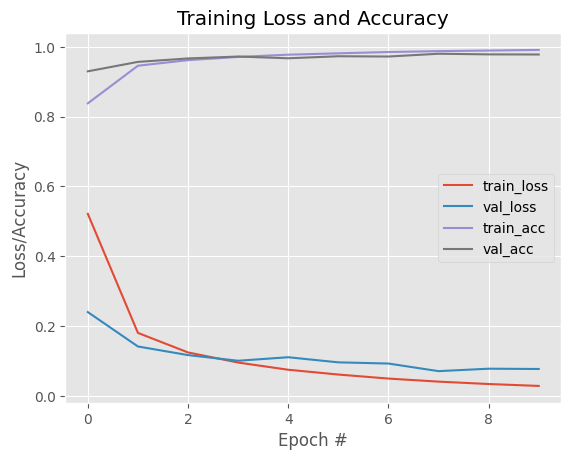

In [4]:
act = tf.nn.relu
learning_rate = 0.1
lr_decay = 1e-3
num_epochs = 10
batch_size = 128
train_deep_net(act, learning_rate, batch_size, num_epochs)